### **Consumo y Demanda de Energía en Sistemas de Potencia**

#### **Objeto**

Poner en práctica los conceptos y temas vistos en el curso propedéutico, a fin de plantear propuestas de aproximación para el análisis del comportamiento del consumo y la demanda de Energía Eléctrica (EE) en un sistema de potencia.

#### **Contenido:**
+ Definiciones
+ Planteamientos de aproximación propuestos:
+ Pronóstico de la demanda y consumo
+ Cálculo de energía consumida
+ Análisis estadístico del perfil de demanda y consumo
+ Modelado del fenómeno (demanda/consumo de EE)
+ Interpolación/Extrapolación
+ Integrador de funciones
+ Series de tiempo
+ Conclusiones y trabajos futuros

#### **Planteamientos**

**1 - Pronóstico de la demanda y consumo**
Dada una estadística de valores de demanda y consumo (de septiembre de 2017 a julio de 2020 –BD de trabajo) se pretende caracterizar un modelo polinomial para estimar los valores de demanda/consumo de los próximos meses.

**¿Por qué?**
El pronóstico del consumo y la demanda de energía eléctrica es una actividad esencial para la operación y planeación de los sistemas de potencia, a fin de garantizar su correcta operación en los diferentes horizontes de tiempo.

**2 - Cálculo del consumo de energía**
La información de consumo recabada en la BD de trabajo se calcula utilizando promedios para cada intervalo de 1 hora. Se desea calcular la energía de el mismo periodo utilizando funciones aproximadas que se ajusten a la forma de la curva de demanda y compararlas.

**¿Por qué?**
Es importante definir la granularidad de la información que se puede obtener de los sistemas de registros. Considerar periodos menores a 1 hora podría significar una gran cantidad de recursos para su almacenamiento y procesamiento. Por eso es importante definir hasta qué grado se pueden obtener estimaciones adecuadas con diferentes espaciamiento en las muestras. 

**3 - Análisis estadístico del perfil de demanda/consumo**
La forma que tiene una curva de demanda presenta ciertos patrones que sugieren comportamientos repetitivos en diferentes horizontes de tiempo (día, semana, año). Se plantea analizar el fenómeno de demanda de energía y consumo como una serie de tiempo para obtener más información de su comportamiento.

**¿Por qué?**
Debido a las variaciones que presenta el fenómeno de demanda y consumo de EE es de interés dar una representación estadística para identificar patrones que se puedan predecir y ayuden en la toma de decisiones en la operación y planeación del sistema de potencia.

#### **Visualización**



In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from utils import MSE

In [4]:
# Dataset de trabajo
data_horas = pd.read_csv("Datos_csv.csv")
data_horas.head(5)

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
0,1,2017,01-sep,0,1,6872.013385,6976.172363,1
1,2,2017,01-sep,1,2,6660.573651,6709.388672,1
2,3,2017,01-sep,2,3,6504.232961,6568.017090,1
3,4,2017,01-sep,3,4,6435.836442,6502.294434,1
4,5,2017,01-sep,4,5,6437.741557,6384.402344,1


Cuyos datos estadísticos descriptivos son los siguientes

In [5]:
list_int = np.array(list(data_horas["dema_int"]))
list_inst = np.array(list(data_horas["dem_inst"]))

In [6]:
data_int = pd.DataFrame(list_int , columns = ['Demanda Integrada']) 
data_inst = pd.DataFrame(list_inst , columns = ['Demanda Instantánea']) 
data_int['Demanda Instantánea'] = data_inst['Demanda Instantánea']
data_int.head(5)

,Demanda Integrada,Demanda Instantánea
0,6872.013385,6976.172363
1,6660.573651,6709.388672
2,6504.232961,6568.017090
3,6435.836442,6502.294434
4,6437.741557,6384.402344


In [7]:
data_int.describe()

,Demanda Integrada,Demanda Instantánea
count,25152.000000,25152.000000
mean,7745.438583,7734.933778
std,974.363777,977.956108
min,4288.339301,4230.882324
25%,7011.455212,6998.106567
50%,7807.317117,7794.049072
75%,8484.490007,8478.522950
max,10567.494660,11267.710940


Nos interesa, de momento, encontrar un modelo fiable que se ajuste a los datos de la demanda instantánea, que es el promedio de la energía consumida en una hora

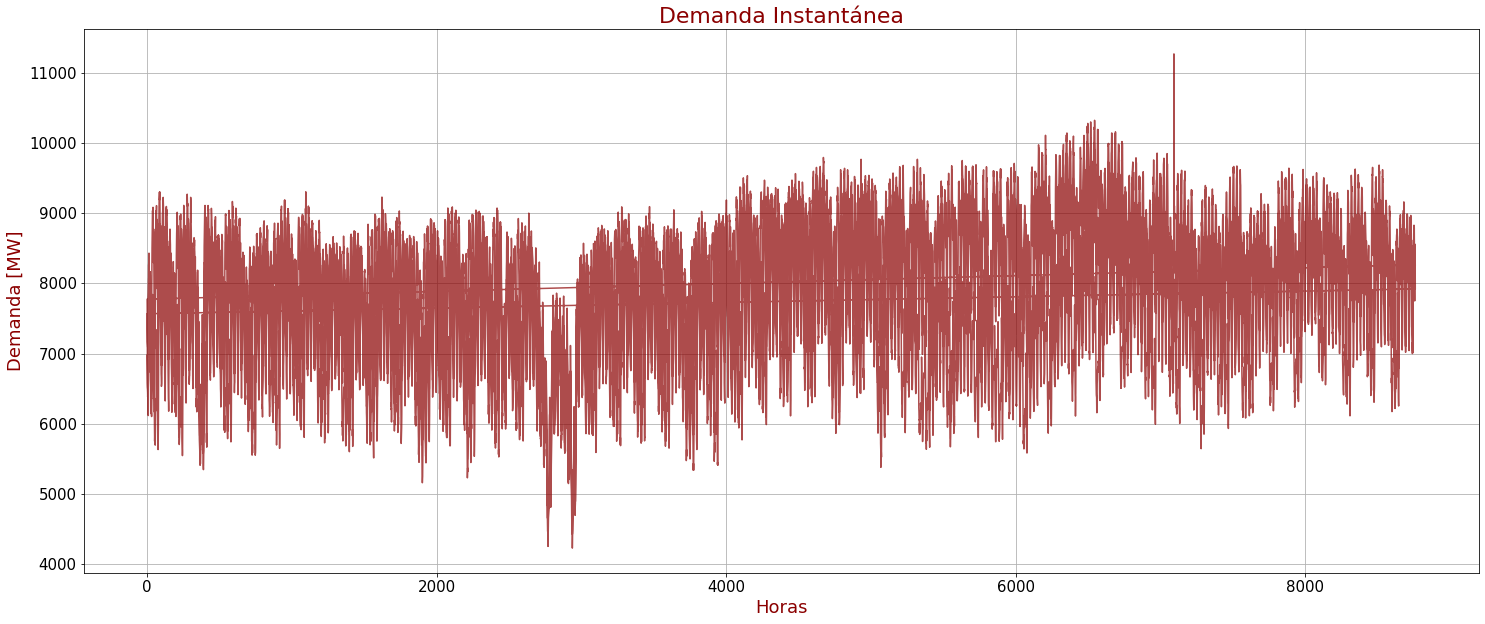

In [9]:
plt.figure(figsize=(25,10))
plt.plot(data_horas.muestras, data_horas.dem_inst, 'b-', color = 'darkred' , alpha = 0.7)
plt.title("Demanda Instantánea" , fontsize = 22 , color = 'darkred')
plt.xlabel("Horas" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Demanda_Instantanea.png')
plt.show()

Donde el promedio del consumo horario se muestra a continuación.

Como vemos, los datos presentan muchas oscilaciones, debido a ello, tomaremos los promedios por día, semanas y meses con el objetivo de observar si los datos se simplifican lo suficiente como para hallar un modelo simple que se ajuste a ellos.


#### **Demanda Promedio Díaria** 

De acuerdo a los datos del análisis descriptivo se cuentan con 25152 registros de horas, por ello, sacaremos los promedios de cada 24 registros consecutivos para obtener el promedio de la demanda diaría.

In [10]:
horas_tot = 25152 # Horas totales registradas
num_d = int(horas_tot/24)
prom_dia = []
for i in range(0,num_d):
    ini = 24*i
    end = 24*(1+i)
    data_i = data_horas[ini:end]
    prom_dia.append(data_i["dem_inst"].mean())

In [11]:
prom_a_dia = np.array(prom_dia)
x_dia = np.array(list(range(1,len(prom_dia)+1)))

In [12]:
mpoints = len(prom_dia)
x_dia_grph_1 = np.linspace(min(x_dia) , max(x_dia) , mpoints)
y_dia_grph_1 = np.array(prom_dia)

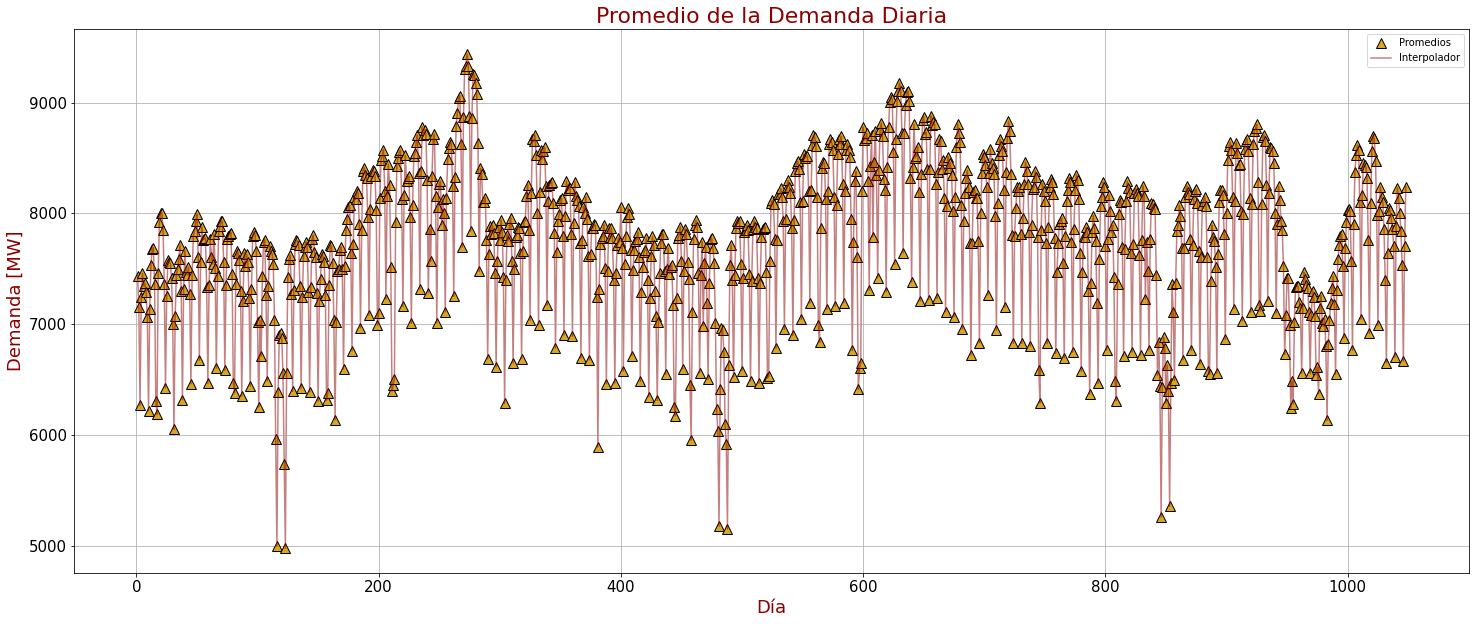

In [13]:
plt.figure(figsize=(25,10))
plt.plot(x_dia , prom_a_dia , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_dia_grph_1 , y_dia_grph_1 , color = 'darkred' , alpha = 0.5)
plt.title("Promedio de la Demanda Diaria" , fontsize = 22 , color = 'darkred')
plt.xlabel("Día" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Promedio_Dia.png')
plt.show()

#### **Interpolador Para la Demanda Instantánea Diaria**

La función *polyfit()* sólo acepta hasta un número máximo para el grado del polinomio para interpolar, debido a ello, tomaremos una muestra cada cinco días de los promedios diarios del $80\%$ de los datos para hacer el interpolador con un polinomio de grado 140, siendo este número el máximo número que acepta para el grado del interpolador.

In [40]:
n_m = []
x = []
k = 0
n_puntos = 140 # Solo submúltiplos de 1,800
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+(840/n_puntos)

y = []
for i in range(len(x)):
    y.append(data_dia.Promedio[n_m[i]])

coef_aj = np.polyfit(x, y, len(x)-1)

neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         data_dia.Dia, data_dia.Promedio, 'k-')

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [ ]:
prom_a_dia = np.array(prom_dia)
x_dia = np.array(list(range(1,len(prom_dia)+1)))

In [13]:
dias_tot = 1048 # Horas totales registradas
num_d = int(dias_tot*0.8/140)
num_d

5

In [41]:
prom_dia_80 = []
for i in range(0,140):
    ini = 5*i
    end = 5*(1+i)
    data_i = data_dia[ini:end]
    prom_dia_80.append(data_i["Promedio"].mean())

##### **Interpolador Para la Demanda Instantánea Semanal**

Ahora por semana, indistitanmente de a qué mes pertenezca, los días restantes se promediarán y se contarán como otra semana como se verá más adelante.

De acuerdo a las pruebas hechas nos damos cuenta que el límite del grado del polinomio que acepta, en este caso, polyfit, es 141. Sin embargo, para poner a prueba nuestro modelo, sólo necesitaremos el $80\%$ de los datos y el otro $20\%$ para hacer el test gráfico del modelo

In [14]:
data_dia = pd.DataFrame(prom_dia, columns = ['Promedio'])
dia = pd.DataFrame(x_dia, columns = ['Dia']) 
data_dia['Dia'] = dia['Dia']

num_s = int(len(data_dia)/7)
prom_sem = []
for i in range(0,num_s):
    ini = 7*i
    end = 7*(1+i)
    data_i = data_dia[ini:end]
    prom_sem.append(data_i["Promedio"].mean())

Agreguemos ahora el promedio de los otros seis días restantes

In [15]:
prom_sem.append(data_dia[num_s*7: num_s*7 + 6]["Promedio"].mean())
prom_a_sem = np.array(prom_sem)
x_sem = np.array(list(range(1,len(prom_sem)+1)))

Mostremos los últimos cinco datos de los promedios semanales

In [16]:
data_sem = pd.DataFrame(prom_sem, columns = ['Promedio']) 
sem = pd.DataFrame(x_sem, columns = ['Semana']) 
data_sem['Semana'] = sem['Semana']
data_sem.tail(5)

,Promedio,Semana
145,8146.903320,146
146,7993.790376,147
147,7654.957781,148
148,7790.388611,149
149,7596.880754,150


Si contamos los seis días restantes como otras semana se tiene 150 semanas en total donde el $80\%$ de ellas son 120 y el número más pequeño y cercano que sea múltiplo de siete es 119. Entonces, obtengamos los arrays y dataframe con estos datos

In [17]:
num_s_i = 120
prom_sem_i = []
for i in range(0,num_s_i):
    ini = 7*i
    end = 7*(1+i)
    data_i = data_dia[ini:end]
    prom_sem_i.append(data_i["Promedio"].mean())

In [18]:
prom_a_sem_i = np.array(prom_sem_i)
x_sem_i = np.array(list(range(1,len(prom_sem_i)+1)))

data_sem_i = pd.DataFrame(prom_sem_i, columns = ['Promedio']) 
sem_i = pd.DataFrame(x_sem_i, columns = ['Semana']) 
data_sem_i['Semana'] = sem_i['Semana']
data_sem_i.tail(5)

,Promedio,Semana
115,7373.456212,116
116,7831.342195,117
117,7842.172855,118
118,7700.119655,119
119,7714.911955,120


Obtengamos ahora el interpolador para el conjunto de 130 registros o conjunto de entrenamiento

In [19]:
d_sem = len(prom_sem_i) - 1
inter_sem = np.polyfit(x_sem_i , prom_a_sem_i , d_sem)

De esta manera, podemos graficarlo sobre los registros del *dataset*

In [20]:
mpoints = len(prom_sem_i) + 1
x_sem_grph_1 = np.linspace(min(x_sem_i) , max(x_sem_i) , mpoints)
y_sem_grph_1 = np.polyval(inter_sem , x_sem_grph_1)

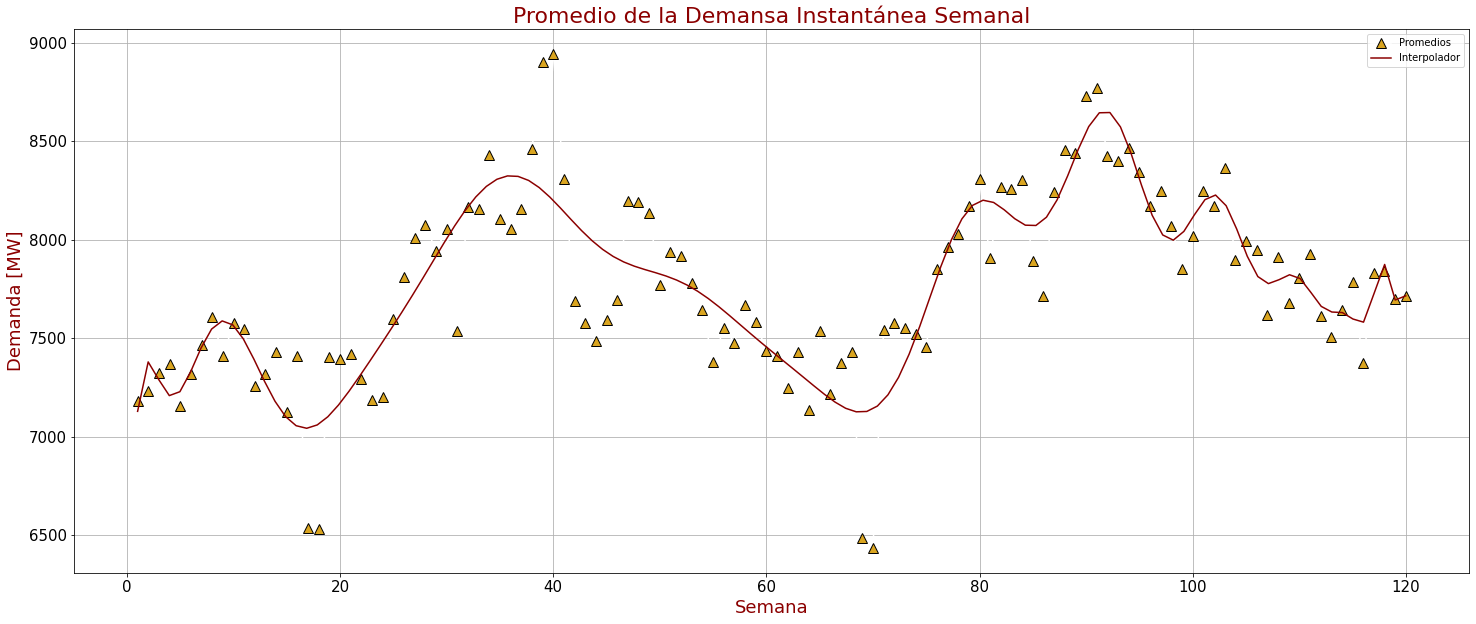

In [21]:
plt.figure(figsize=(25,10))
plt.plot(x_sem_i , prom_sem_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_1 , y_sem_grph_1 , color = 'darkred')
plt.title("Promedio de la Demansa Instantánea Semanal" , fontsize = 22 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_sem_1.png')
plt.show()

Finalmente graficaremos el interpolador junto con el conjunto de test para ver que tan fiable es el modelo obtenido

In [22]:
mpoints = len(prom_sem) + 1
x_sem_grph_2 = np.linspace(min(x_sem) , max(x_sem) , mpoints)
y_sem_grph_2 = np.polyval(inter_sem , x_sem_grph_2)

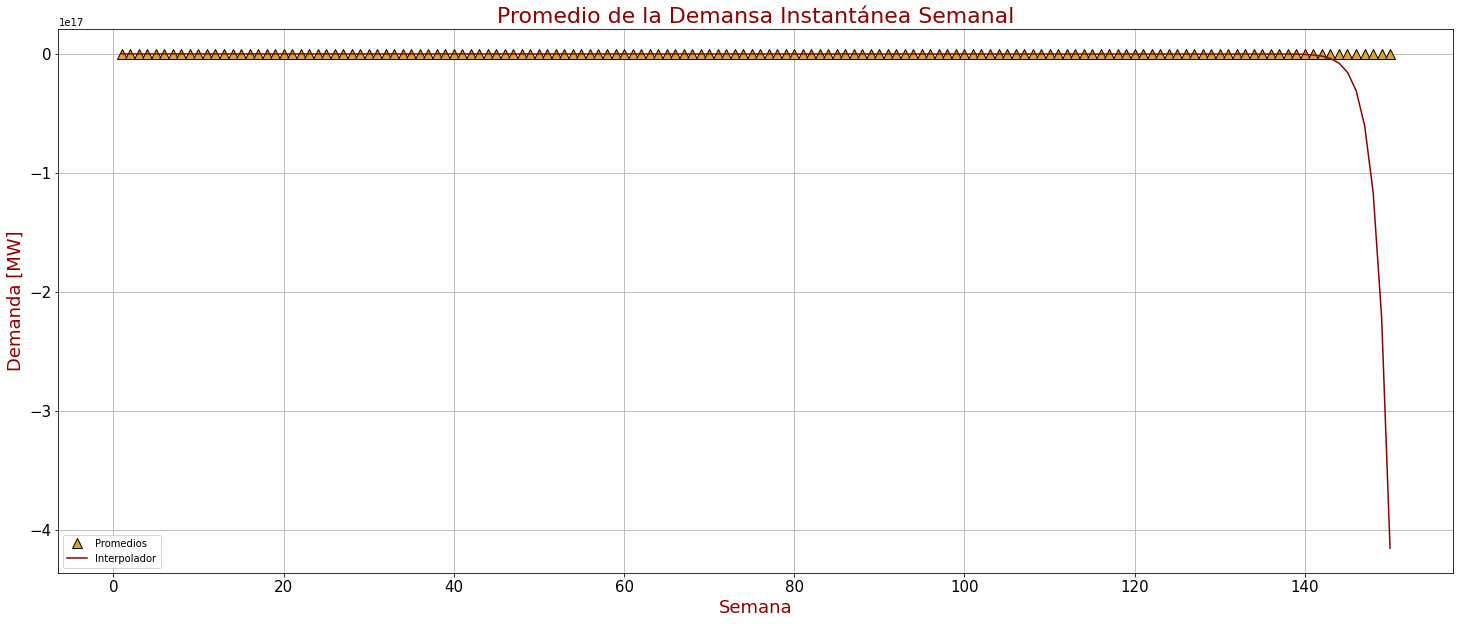

In [24]:
plt.figure(figsize=(25,10))
plt.plot(x_sem , prom_sem , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_2 , y_sem_grph_2 , color = 'darkred')
plt.title("Promedio de la Demansa Instantánea Semanal" , fontsize = 22 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_sem_2.png')
plt.show()

Hagamos un acercamiento en donde diverge el interpolador con los demás puntos

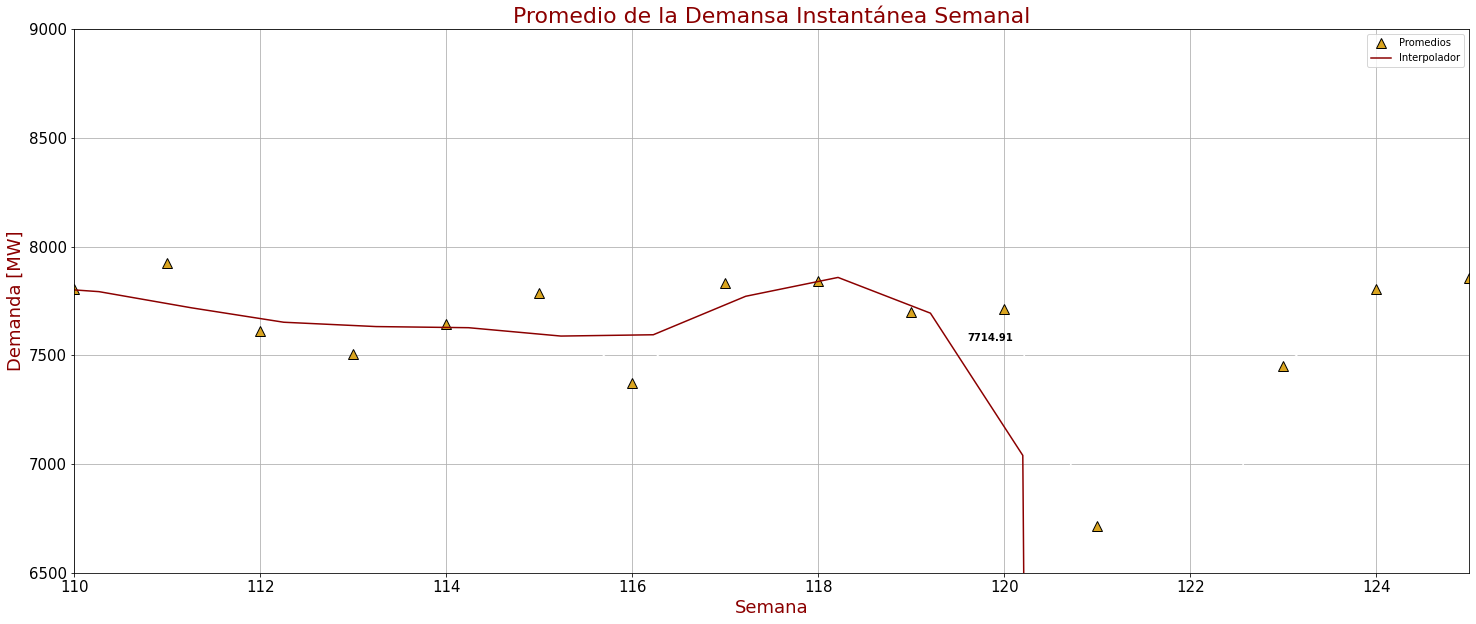

In [25]:
plt.figure(figsize=(25,10))
plt.plot(x_sem , prom_sem , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_2 , y_sem_grph_2 , color = 'darkred')
plt.text(119.6, data_sem_i.iat[119,0] -150 , str(7714.91) , horizontalalignment = 'left' , fontweight = "bold")
plt.title("Promedio de la Demansa Instantánea Semanal" , fontsize = 22 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim([110, 125]) 
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_sem_3.png')
plt.show()

**Errores:**

En esta parte obtendremos los errores cuadráticos medios de nuestro modelos y los promedios del conjunto de entrenamiento. No sacaraemos los errores respecto al conjunto de prueba porque de la gráfica se observa que serán extremadamente grandes debido a que divergen enormemente de los dmeás promedios.

In [36]:
prom_sem_obj_80 = prom_a_sem_i
x_sem_80 = x_sem_i
prom_sem_80 = inter_sem

Ahora calculemos los errores

In [39]:
ecm_sem = MSE(prom_sem_obj_80 , prom_sem_80)
print(ecm_sem)

59879623.92817483


Vemos que incluso los errores cuadráticos medios osn muy grandes incluso respecto al conjunto de entrnamiento.

+ **Mes**

Se repetirá el procedimiento anterior para los promedios mensuales, donde habrá dos semanas que sobrarán ya que no completan el mes de Febrero del 2020.

In [26]:
num_m = int(len(prom_sem)/4)
prom_mes = []
for i in range(0,num_m):
    ini = 4*i
    end = 4*(1+i)
    data_i = data_sem[ini:end]
    prom_mes.append(data_i["Promedio"].mean())

In [27]:
prom_mes.append(data_sem[148:150]["Promedio"].mean())
prom_a_mes = np.array(prom_mes)
x_mes = np.array(list(range(1,39)))

data_mes = pd.DataFrame(prom_mes, columns = ['Promedio']) 
mes = pd.DataFrame(x_mes, columns = ['Mes']) 
data_mes['Mes'] = mes['Mes']
data_mes.tail(5)

,Promedio,Mes
33,7917.955393,34
34,6999.597718,35
35,7486.651449,36
36,7991.699747,37
37,7693.634682,38


Para el conjunto de prueba tomemos hasta el mes 32 ya que sería el números de meses más aproximados al $\%80$ del conjunto total de los promedios mensuales

In [28]:
num_m_i = 32
prom_mes_i = []
for i in range(0,num_m_i):
    ini = i
    end = 1+i
    data_i = data_mes[ini:end]
    prom_mes_i.append(data_i["Promedio"].mean())
    
prom_a_mes_i = np.array(prom_mes_i)
x_mes_i = np.array(list(range(1,len(prom_mes_i)+1)))

donde el conjunto de entrenamiento es el siguiente

In [29]:
data_mes_i = pd.DataFrame(prom_mes_i, columns = ['Promedio']) 
mes_i = pd.DataFrame(x_mes_i, columns = ['Mes']) 
data_mes_i['Semana'] = mes_i['Mes']
data_mes_i.tail(5)

,Promedio,Semana
27,7754.964906,28
28,7577.425080,29
29,7772.136665,30
30,7092.375620,31
31,7685.094406,32


Con esto, ya podemos construir nuestro interpolador

In [30]:
d_mes = len(prom_a_mes_i) - 1
d_mes = len(prom_mes_i) - 1
inter_mes = np.polyfit(x_mes_i , prom_a_mes_i , d_mes)

In [31]:
mpoints = len(prom_sem_i) + 1
x_mes_grph_1 = np.linspace(min(x_mes_i) , max(x_mes_i) , mpoints)
y_mes_grph_1 = np.polyval(inter_mes , x_mes_grph_1)

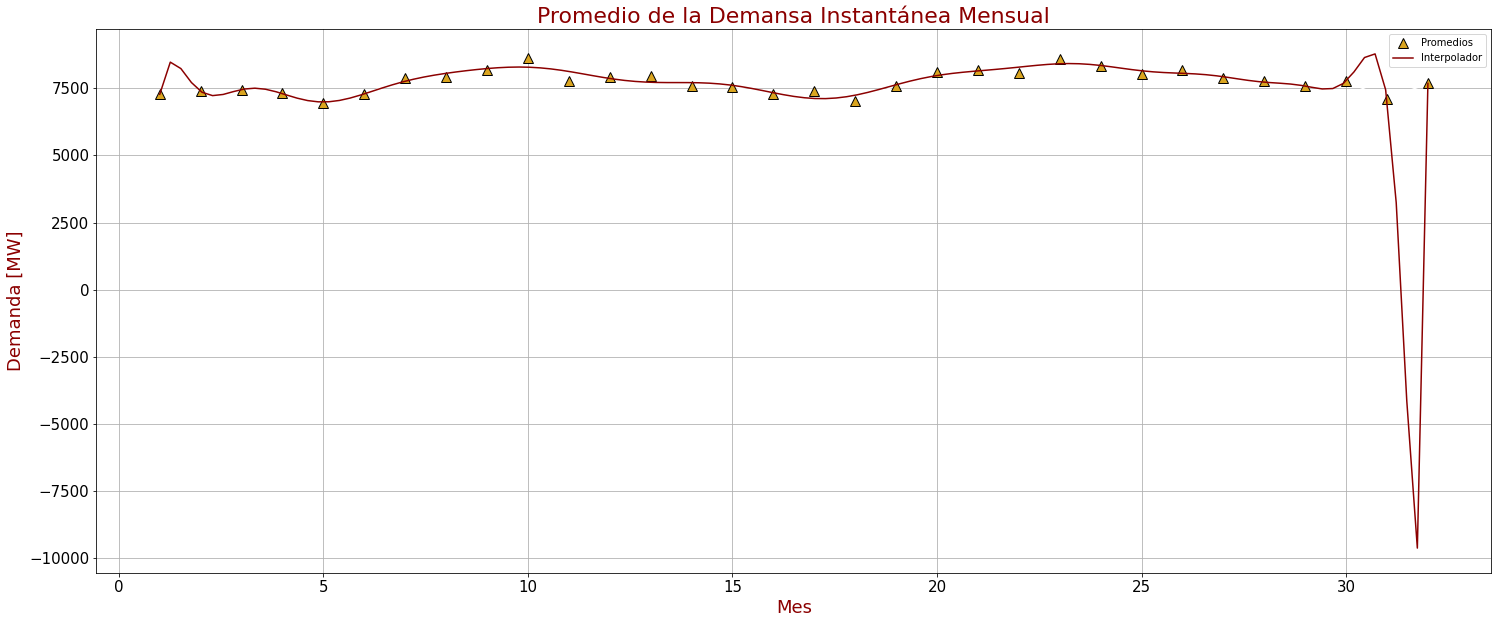

In [32]:
plt.figure(figsize=(25,10))
plt.plot(x_mes_i , prom_mes_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_1 , y_mes_grph_1 , color = 'darkred')
plt.title("Promedio de la Demansa Instantánea Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_mes_1.png')
plt.show()

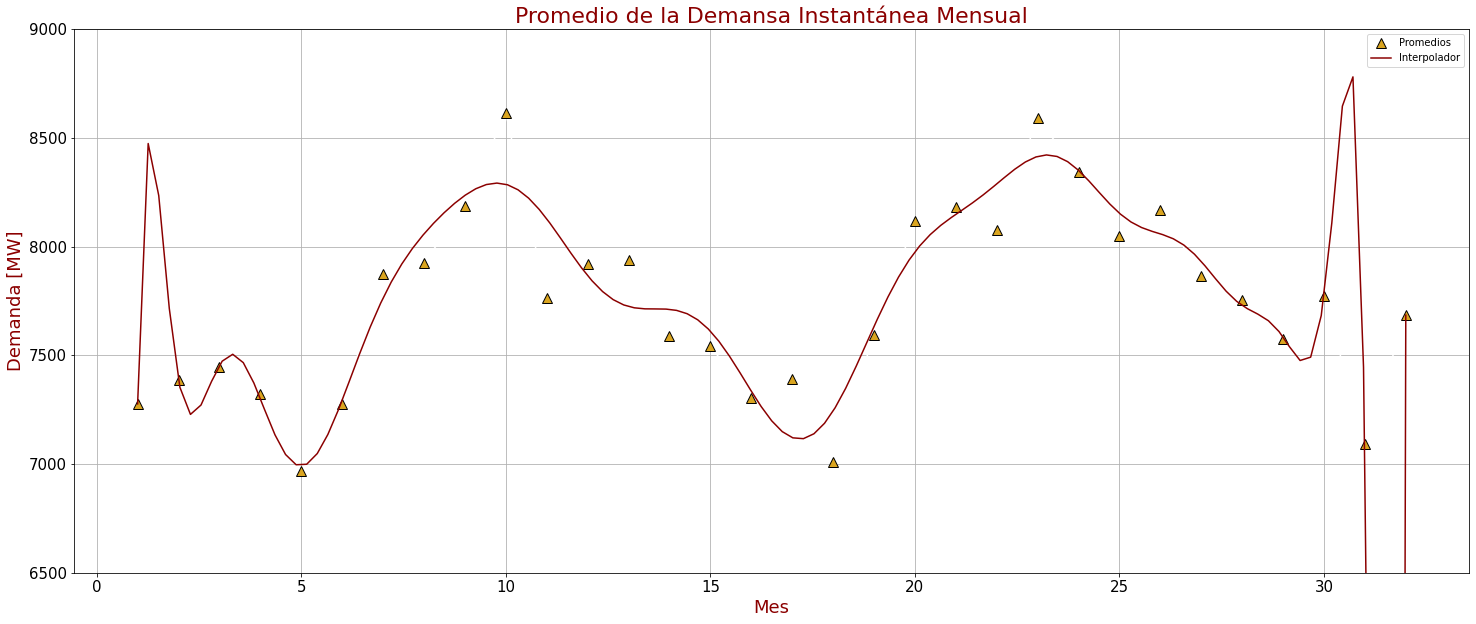

In [33]:
plt.figure(figsize=(25,10))
plt.plot(x_mes_i , prom_mes_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_1 , y_mes_grph_1 , color = 'darkred')
plt.title("Promedio de la Demansa Instantánea Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_mes_2.png')
plt.show()

Análogamente al caso anterior, veamos si este modelo se acerca a los promedio de los meses restantes

In [34]:
mpoints = len(prom_mes) + 1
x_mes_grph_2 = np.linspace(min(x_mes) , max(x_mes) , mpoints)
y_mes_grph_2 = np.polyval(inter_mes , x_mes_grph_2)

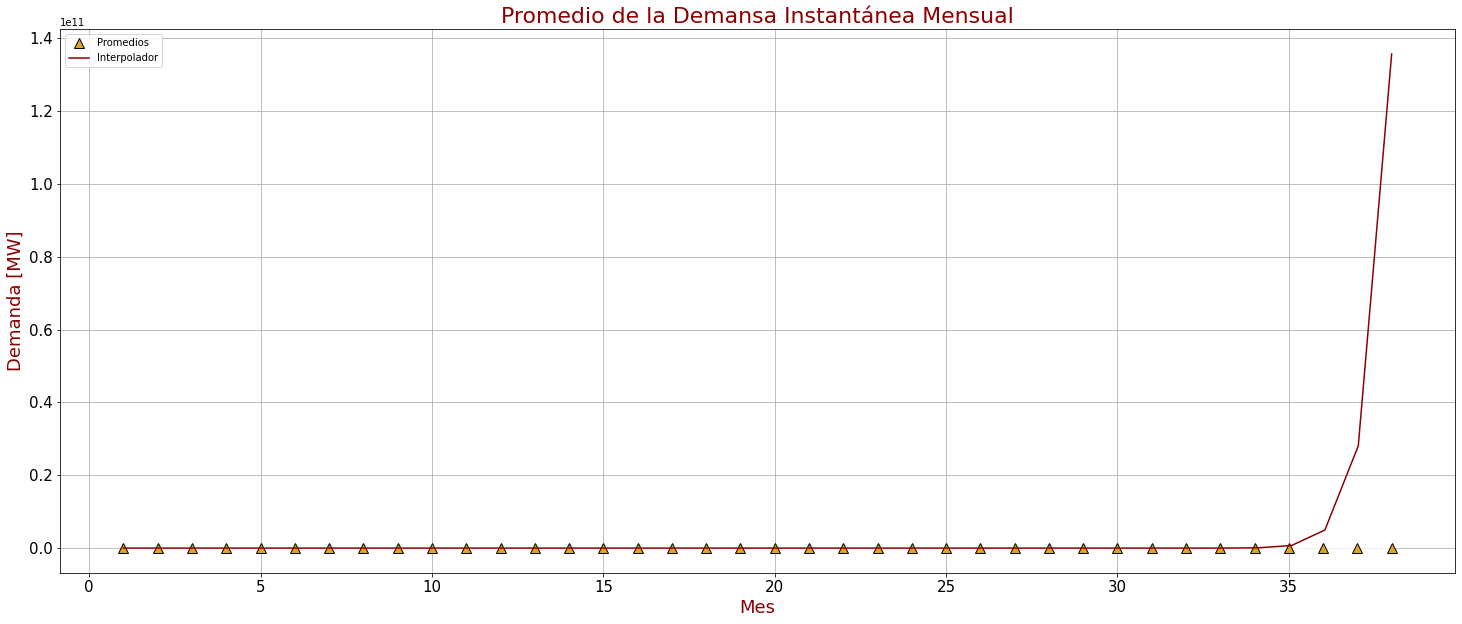

In [35]:
plt.figure(figsize=(25,10))
plt.plot(x_mes , prom_mes , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_2 , y_mes_grph_2 , color = 'darkred')
plt.title("Promedio de la Demansa Instantánea Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_sem_3.png')
plt.show()

donde el *close-up* es

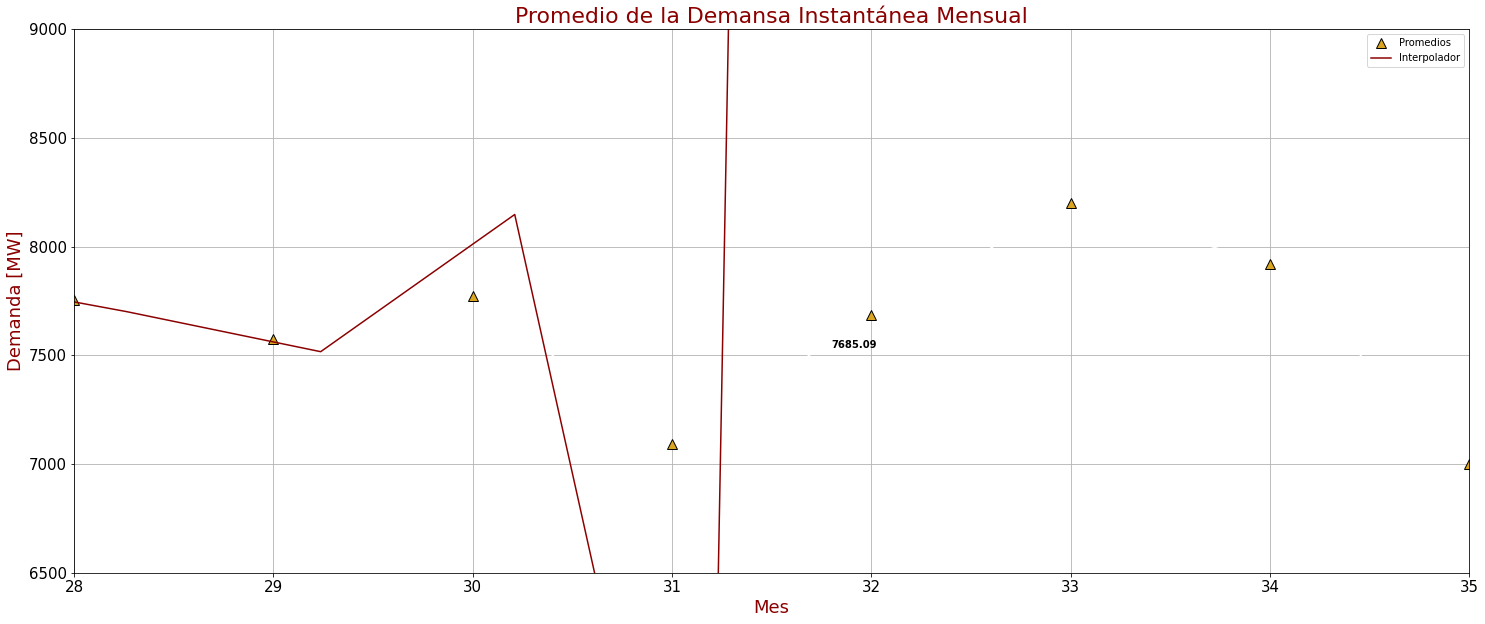

In [46]:
plt.figure(figsize=(25,10))
plt.plot(x_mes , prom_mes , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_2 , y_mes_grph_2 , color = 'darkred')
plt.text(31.8 , data_mes_i.iat[31,0] -150 , str(7685.09) , horizontalalignment = 'left' , fontweight = "bold")
plt.title("Promedio de la Demansa Instantánea Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim([28, 35]) 
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_sem_4.png')
plt.show()

Se observa que el interpolador no es un buen modelo para el caso semanal ni mensual puesto que no sé acerca a los valores de su conjunto de test, respectivamente.

**Errores:**

Análogamente al caso semanal

In [37]:
prom_mes_obj_80 = prom_a_mes_i
x_mes_80 = x_mes_i
prom_mes_80 = inter_mes

In [38]:
ecm_mes = MSE(prom_mes_obj_80 , prom_mes_80)
print(ecm_mes)

8916042848.336073


Vemos que incluso, en comparación con los promedios semanales, los errores para el caso mensual son incluso mayores.

### **Promedios Totales de la Demanda Anual**

En este caso, se sacarón los promedio por mes de los tres años y luego promediarlos de acurdo al número de veces que ese mes apareciera en el *dataframe*

In [42]:
Meses = ['Enero' , 'Febrero' , 'Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 'Agosto' , 'Septiembre' , 'Octubre' , 'Nobiembre' , 'Diciembre']

x_hist = list(range(1,13))
prom_hist = [1,2,3,4,5,6,7,8,9,10,11,12]
prom_hist[8] = (data_mes.iat[0,0] + data_mes.iat[12,0] + data_mes.iat[24,0])/3
prom_hist[9] = (data_mes.iat[1,0] + data_mes.iat[13,0] + data_mes.iat[25,0])/3
prom_hist[10] = (data_mes.iat[2,0] + data_mes.iat[14,0] + data_mes.iat[26,0])/3
prom_hist[11] = (data_mes.iat[3,0] + data_mes.iat[15,0] + data_mes.iat[27,0])/3
prom_hist[0] = (data_mes.iat[4,0] + data_mes.iat[16,0] + data_mes.iat[28,0])/3
prom_hist[1] = (data_mes.iat[5,0] + data_mes.iat[17,0] + data_mes.iat[29,0] + data_mes.iat[36,0])/4
prom_hist[2] = (data_mes.iat[6,0] + data_mes.iat[18,0] + data_mes.iat[30,0] + data_mes.iat[37,0])/4
prom_hist[3] = (data_mes.iat[7,0] + data_mes.iat[19,0] + data_mes.iat[31,0])/3
prom_hist[4] = (data_mes.iat[8,0] + data_mes.iat[20,0] + data_mes.iat[32,0])/3
prom_hist[5] = (data_mes.iat[9,0] + data_mes.iat[21,0] + data_mes.iat[33,0])/3
prom_hist[6] = (data_mes.iat[10,0] + data_mes.iat[22,0] + data_mes.iat[34,0])/3
prom_hist[7] = (data_mes.iat[11,0] + data_mes.iat[23,0] + data_mes.iat[35,0])/3

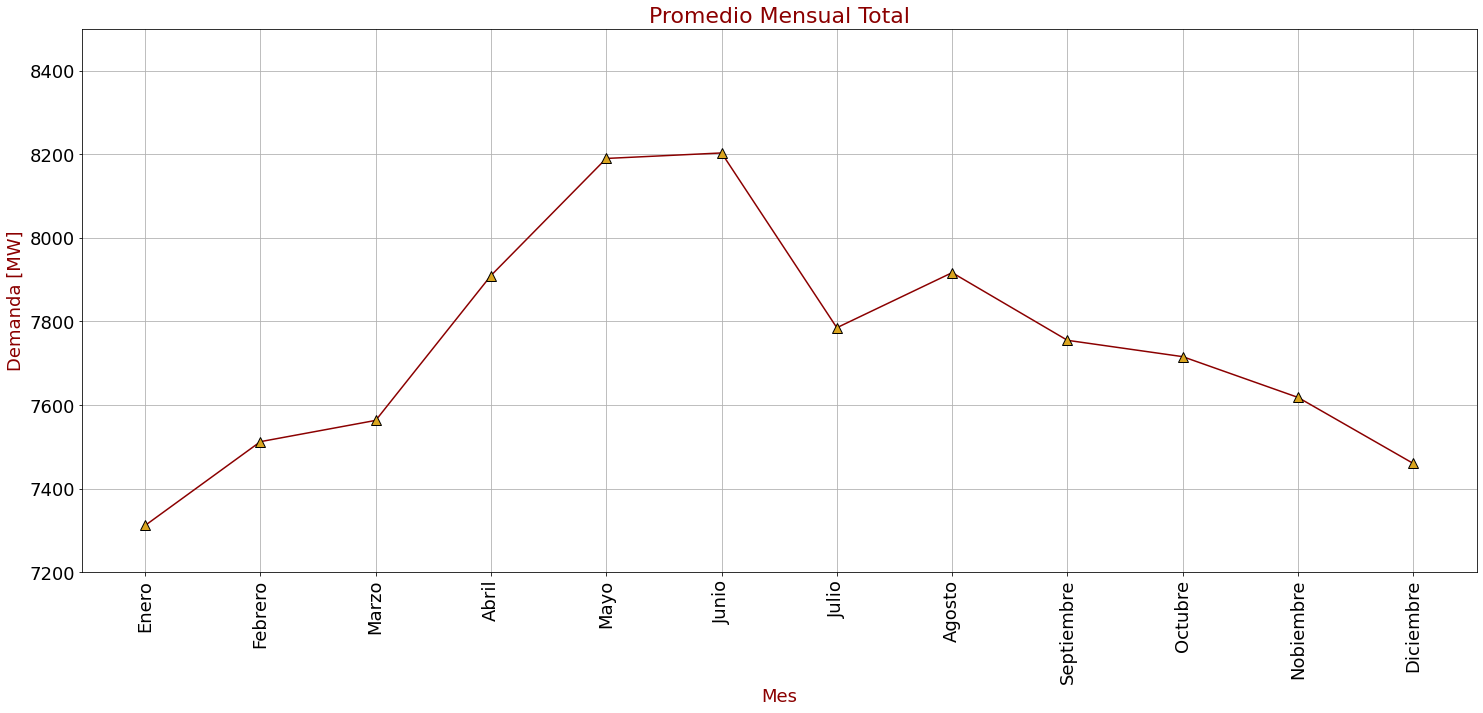

In [49]:
plt.figure(figsize=(25,10))
plt.plot(x_hist , prom_hist , color= 'darkred' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.title("Promedio Mensual Total" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.yticks(fontsize = 18)
plt.xticks(list(range(1,13)), Meses , rotation = 'vertical' , fontsize = 18)
plt.ylim([0,9000]) 
plt.grid(True)
plt.ylim([7200,8500]) 
plt.savefig('Inter_mes_tot_2.png')
plt.show()

Lo que nos dice el gráfico es que hay una mayor demanda de energía en Verano siendo el de mayor consumo en Junio, mientras que el mínimo se reporta para Enero. Este se puede deber a que en Verano, la gente usa más el aire condicionado, ventiladores y a fines por el calor.